In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
csvdata = pd.read_csv('iris.csv', index_col = 0)
csvdata.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# extract features and normalize data(!)
data = csvdata[csvdata.columns[:-1]]
data = (data - data.mean()) / (data.max() - data.min())

# extract labels and replace with indexes
labels = csvdata[csvdata.columns[-1]]
idx = 0
labels_set = set(labels)
for label in set(labels):
    labels = labels.replace(label, idx)
    idx = idx+1

In [3]:
#
# Builds a simple NN with one hidden layer
#
def build_model(input_features, hidden_units, output_features):
    
    # inputs
    X = tf.placeholder(tf.float32,[None,input_features], name="input")   
    print('input', X)
    
    # hidden layers
    layer = X 
    for units in hidden_units:
        # hiden layer
        w = tf.Variable(tf.random_uniform([int(layer.shape[1]), units], -1, 1))
        b = tf.Variable(tf.random_uniform([1, units], -1, 1))
        layer = tf.nn.relu(tf.add(tf.matmul(layer, w), b))
        layer_inputs = units
        print('hidden', layer)

    # output layer
    w2 = tf.Variable(tf.random_uniform([int(layer.shape[1]), output_features], -1, 1))
    b2 = tf.Variable(tf.random_uniform([1, output_features], -1, 1))
    output = tf.nn.softmax(tf.add(tf.matmul(layer, w2), b2))
    print('output', output)
    
    # targets
    Y = tf.placeholder(tf.int32,name="output")
    
    return X, output, Y

input_features=data.shape[1]
output_features=len(set(labels))

# build our model
x, output, y = build_model(input_features, [10, 10, 4], output_features)

# converter from one hot vector to labels
output_labels = tf.argmax(output, axis=1)


('input', <tf.Tensor 'input:0' shape=(?, 4) dtype=float32>)
('hidden', <tf.Tensor 'Relu:0' shape=(?, 10) dtype=float32>)
('hidden', <tf.Tensor 'Relu_1:0' shape=(?, 10) dtype=float32>)
('hidden', <tf.Tensor 'Relu_2:0' shape=(?, 4) dtype=float32>)
('output', <tf.Tensor 'Softmax:0' shape=(?, 3) dtype=float32>)


Accuracy: 97.4640548229%


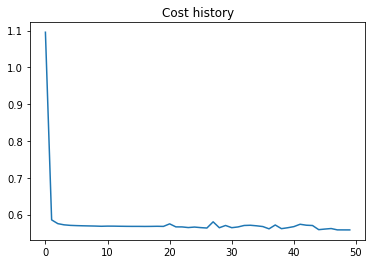

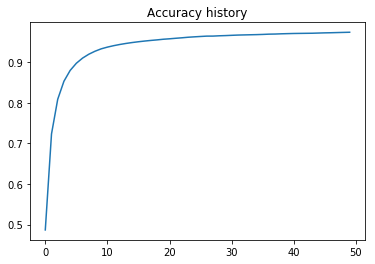

In [4]:
# cost function
cost = tf.losses.sparse_softmax_cross_entropy(y, output)

# optimizer as gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

# accuracy metric
acc, acc_op = tf.metrics.accuracy(labels=y, predictions=output_labels)

# run training session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

cost_history = []
acc_history = []
for epoch in range(5000):
    sess.run(optimizer, feed_dict={x:data, y:labels})
    if epoch % 100 == 0:
        cost_history.append( sess.run(cost, feed_dict={x:data, y:labels}) )
        acc_history.append( sess.run(acc_op, feed_dict={x:data, y:labels}) )


print('Accuracy: {}%'.format(100*sess.run(acc_op, feed_dict={x:data, y:labels})))
     
# plot training progress
predicted_labels = sess.run(output_labels, feed_dict={x:data, y:labels})
plt.plot(cost_history)
plt.title('Cost history')
plt.show()

plt.plot(acc_history)
plt.title('Accuracy history')
plt.show()